# Neural Network Preliminary Code

## Import Libraries

In [ ]:
%%capture
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, auc
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Embedding

import os
import glob
import fileinput
import matplotlib.pyplot as plt
import seaborn as sns

##CTU13

In [ ]:
# list of scenarios
scenarios = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt', '10.txt', '11.txt', '12.txt', '13.txt']

# empty list to capture statistics for each scenario
results = [] 
precision_recall_all = pd.DataFrame()

In [ ]:
from keras.engine.input_layer import Input
# iterate over scenarios to build, train, and evaluate LSTM model
for filename in scenarios:

    scenario_name = filename.replace(".txt", "")
    # load the dataset
    scenario = np.genfromtxt('/content/' + filename, delimiter=',', invalid_raise = False)
    scenario = np.nan_to_num(scenario, nan = 0.0)

    # split into input (X) and output (y) variables
    X = scenario[:,1:]
    y = scenario[:,0]
    
    # split into training (80%), validation (10%), and test (10%) sets
    rand_seed = 123
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8,
                                                      random_state = rand_seed,
                                                      stratify = y)
    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, 
                                                        train_size = 0.5,
                                                        random_state = rand_seed,
                                                        stratify = y_rem)
    
    # build NN model
  
    model = Sequential()
    model.add(Dense(12, input_dim = 28, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = 'sigmoid'))

    #compile and fit the model
    model.compile(loss='binary_crossentropy', optimizer = 'adam',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size = 32, epochs = 2,
              validation_data=(X_valid, y_valid))
    
    #make predictions with model and print classification report
    predictions = (model.predict(X_test) > .5).astype(int)
    print(filename)
    print(classification_report(y_test, predictions))

    # calculate metrics for each model
    precision, recall, fscore, support = score(y_test, predictions, 
                                               average = 'binary')
    auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)


    # append metrics to results
    results.append(
        {
          'Scenario': scenario_name,
          'Precision': precision,
          'Recall': recall,
          'F1 Score': fscore,
          'AUC': auc
        })
    
    # write data for precision recall curves to csv
    #exception handling
    cols = ['precision', 'recall', 'thresholds']
    try:  
      precision_recall = precision_recall_curve(y_test, model.predict(X_test))
      precision_recall = pd.DataFrame(precision_recall, index = cols).transpose()
      precision_recall['scenario'] = filename
      precision_recall_all = precision_recall_all.append(precision_recall)
    except ValueError as e:
      if "Input contains NaN" in str(e):
        print("Skipping function due to NaN input.")
      else:
          raise e
    print("scenario", filename, "complete")
    print("------------------------------")

<ipython-input-5-d75dccb303b2>:7: ConversionWarning: Some errors were detected !
    Line #1636503 (got 6 columns instead of 29)
  scenario = np.genfromtxt('/content/' + filename, delimiter=',', invalid_raise = False)


Epoch 1/2
40913/40913 [==============================] - 97s 2ms/step - loss: 143134336.0000 - accuracy: 0.9886 - val_loss: 57.3858 - val_accuracy: 0.9901
Epoch 2/2
5115/5115 [==============================] - 7s 1ms/step
1.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    162037
         1.0       0.00      0.00      0.00      1614

    accuracy                           0.99    163651
   macro avg       0.50      0.50      0.50    163651
weighted avg       0.98      0.99      0.99    163651

5115/5115 [==============================] - 6s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 1.txt complete


<ipython-input-5-d75dccb303b2>:7: ConversionWarning: Some errors were detected !
    Line #1649561 (got 6 columns instead of 29)
  scenario = np.genfromtxt('/content/' + filename, delimiter=',', invalid_raise = False)


Epoch 1/2
41239/41239 [==============================] - 103s 2ms/step - loss: nan - accuracy: 0.9883 - val_loss: nan - val_accuracy: 0.9883
Epoch 2/2
5155/5155 [==============================] - 7s 1ms/step
2.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    163023
         1.0       0.00      0.00      0.00      1933

    accuracy                           0.99    164956
   macro avg       0.49      0.50      0.50    164956
weighted avg       0.98      0.99      0.98    164956

5155/5155 [==============================] - 7s 1ms/step
Skipping function due to NaN input.


<ipython-input-5-d75dccb303b2>:7: ConversionWarning: Some errors were detected !
    Line #1533603 (got 10 columns instead of 29)
  scenario = np.genfromtxt('/content/' + filename, delimiter=',', invalid_raise = False)


Epoch 1/2
38341/38341 [==============================] - 98s 3ms/step - loss: 11630505984.0000 - accuracy: 0.9921 - val_loss: 14.0180 - val_accuracy: 1.0000
Epoch 2/2
4793/4793 [==============================] - 7s 1ms/step
3.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    153357
         1.0       0.00      0.00      0.00         4

    accuracy                           1.00    153361
   macro avg       0.50      0.50      0.50    153361
weighted avg       1.00      1.00      1.00    153361

  35/4793 [..............................] - ETA: 7s  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4793/4793 [==============================] - 7s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 3.txt complete
Epoch 1/2
28027/28027 [==============================] - 72s 3ms/step - loss: 14898828288.0000 - accuracy: 0.9901 - val_loss: 14.9675 - val_accuracy: 0.9977
Epoch 2/2
3504/3504 [==============================] - 5s 1ms/step
4.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111850
         1.0       0.00      0.00      0.00       258

    accuracy                           1.00    112108
   macro avg       0.50      0.50      0.50    112108
weighted avg       1.00      1.00      1.00    112108

3504/3504 [==============================] - 4s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 4.txt complete
Epoch 1/2
3246/3246 [==============================] - 9s 2ms/step - loss: 102458023936.0000 - accuracy: 0.8780 - val_loss: 4545976.0000 - val_accuracy: 0.9728
Epoch 2/2
406/406 [==============================] - 1s 1ms/step
5.txt
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     12894
         1.0       0.00      0.00      0.00        90

    accuracy                           0.99     12984
   macro avg       0.50      0.50      0.50     12984
weighted avg       0.99      0.99      0.99     12984

 83/406 [=====>........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

406/406 [==============================] - 1s 1ms/step
scenario 5.txt complete


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


Epoch 1/2
13973/13973 [==============================] - 34s 2ms/step - loss: 37626168.0000 - accuracy: 0.9866 - val_loss: 0.0539 - val_accuracy: 0.9917
Epoch 2/2
1747/1747 [==============================] - 3s 2ms/step
6.txt
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55429
         1.0       0.00      0.00      0.00       463

    accuracy                           0.99     55892
   macro avg       0.50      0.50      0.50     55892
weighted avg       0.98      0.99      0.99     55892

   1/1747 [..............................] - ETA: 45s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

1747/1747 [==============================] - 2s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 6.txt complete
Epoch 1/2
2852/2852 [==============================] - 8s 3ms/step - loss: 6372941824.0000 - accuracy: 0.9415 - val_loss: 10046.0840 - val_accuracy: 0.9994
Epoch 2/2
357/357 [==============================] - 1s 1ms/step
7.txt
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11402
         1.0       0.00      0.00      0.00         6

    accuracy                           1.00     11408
   macro avg       0.50      0.50      0.50     11408
weighted avg       1.00      1.00      1.00     11408

 85/357 [======>.......................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

357/357 [==============================] - 0s 1ms/step
scenario 7.txt complete


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)
<ipython-input-5-d75dccb303b2>:7: ConversionWarning: Some errors were detected !
    Line #1534884 (got 14 columns instead of 29)
  scenario = np.genfromtxt('/content/' + filename, delimiter=',', invalid_raise = False)


Epoch 1/2
38373/38373 [==============================] - 93s 2ms/step - loss: nan - accuracy: 0.9981 - val_loss: nan - val_accuracy: 0.9983
Epoch 2/2
4797/4797 [==============================] - 7s 1ms/step
8.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    153221
         1.0       0.00      0.00      0.00       268

    accuracy                           1.00    153489
   macro avg       0.50      0.50      0.50    153489
weighted avg       1.00      1.00      1.00    153489

  34/4797 [..............................] - ETA: 7s  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4797/4797 [==============================] - 7s 1ms/step
Skipping function due to NaN input.
Epoch 1/2
39404/39404 [==============================] - 94s 2ms/step - loss: 768890688.0000 - accuracy: 0.8901 - val_loss: 0.2370 - val_accuracy: 0.9364
Epoch 2/2
4926/4926 [==============================] - 7s 1ms/step
9.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    147587
         1.0       0.00      0.00      0.00     10028

    accuracy                           0.94    157615
   macro avg       0.47      0.50      0.48    157615
weighted avg       0.88      0.94      0.91    157615

   1/4926 [..............................] - ETA: 2:13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4926/4926 [==============================] - 6s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 9.txt complete
Epoch 1/2
32745/32745 [==============================] - 75s 2ms/step - loss: 27887935488.0000 - accuracy: 0.9191 - val_loss: 22824.0273 - val_accuracy: 0.9188
Epoch 2/2
4094/4094 [==============================] - 6s 1ms/step
10.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    120345
         1.0       0.00      0.00      0.00     10635

    accuracy                           0.92    130980
   macro avg       0.46      0.50      0.48    130980
weighted avg       0.84      0.92      0.88    130980

  43/4094 [..............................] - ETA: 4s  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4094/4094 [==============================] - 5s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 10.txt complete
Epoch 1/2
2682/2682 [==============================] - 8s 3ms/step - loss: 18743635968.0000 - accuracy: 0.8100 - val_loss: 21691734.0000 - val_accuracy: 0.9236
Epoch 2/2
336/336 [==============================] - 1s 1ms/step
11.txt
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      9909
         1.0       0.00      0.00      0.00       817

    accuracy                           0.80     10726
   macro avg       0.46      0.43      0.44     10726
weighted avg       0.84      0.80      0.82     10726

336/336 [==============================] - 0s 1ms/step
scenario 11.txt complete


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


Epoch 1/2
8137/8137 [==============================] - 21s 2ms/step - loss: 1068383488.0000 - accuracy: 0.9757 - val_loss: 3997958.0000 - val_accuracy: 0.9933
Epoch 2/2
1018/1018 [==============================] - 3s 3ms/step
12.txt
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     32331
         1.0       0.00      0.00      0.00       217

    accuracy                           0.99     32548
   macro avg       0.50      0.50      0.50     32548
weighted avg       0.99      0.99      0.99     32548



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

1018/1018 [==============================] - 1s 1ms/step


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


scenario 12.txt complete


<ipython-input-5-d75dccb303b2>:7: ConversionWarning: Some errors were detected !
    Line #1606189 (got 10 columns instead of 29)
  scenario = np.genfromtxt('/content/' + filename, delimiter=',', invalid_raise = False)


Epoch 1/2
40155/40155 [==============================] - 91s 2ms/step - loss: 175177808.0000 - accuracy: 0.9661 - val_loss: 0.1207 - val_accuracy: 0.9781
Epoch 2/2
5020/5020 [==============================] - 7s 1ms/step
13.txt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    157101
         1.0       0.00      0.00      0.00      3518

    accuracy                           0.98    160619
   macro avg       0.49      0.50      0.49    160619
weighted avg       0.96      0.98      0.97    160619

   1/5020 [..............................] - ETA: 2:10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5020/5020 [==============================] - 6s 1ms/step
scenario 13.txt complete


<ipython-input-5-d75dccb303b2>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


In [ ]:
results_df = pd.DataFrame(results).sort_values('Scenario')
results_df

,Scenario,Precision,Recall,F1 Score,AUC
0,1,0.0,0.0,0.0,0.500000
9,10,0.0,0.0,0.0,0.500000
10,11,0.0,0.0,0.0,0.433848
11,12,0.0,0.0,0.0,0.500000
12,13,0.0,0.0,0.0,0.500000
1,2,0.0,0.0,0.0,0.500000
2,3,0.0,0.0,0.0,0.500000
3,4,0.0,0.0,0.0,0.500000
4,5,0.0,0.0,0.0,0.500000
5,6,0.0,0.0,0.0,0.500000


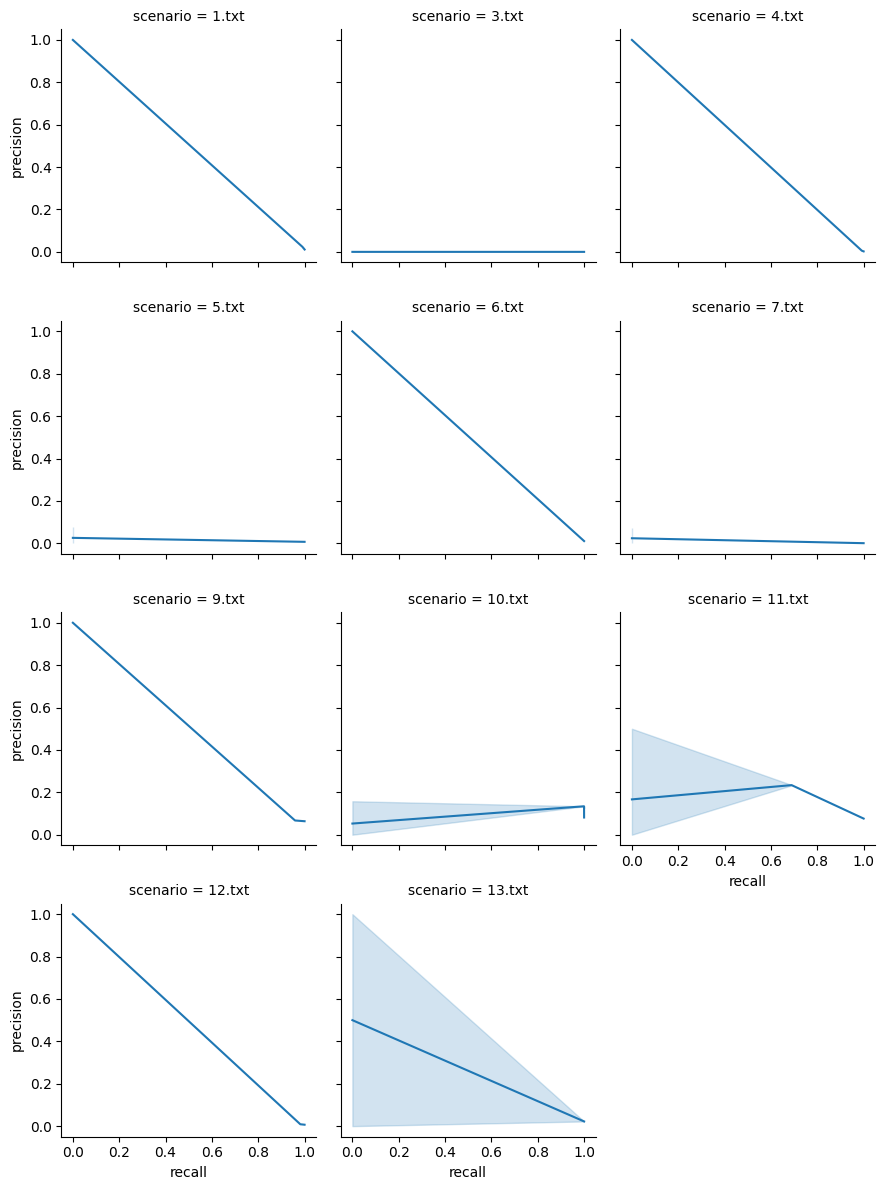

In [ ]:
# precision recall graphs for each scenario
graph = sns.FacetGrid(precision_recall_all, col = 'scenario', col_wrap = 3)
graph.map(sns.lineplot, 'recall', 'precision')

##MTA19

In [ ]:
dfLEG = pd.read_csv('https://raw.githubusercontent.com/IvanLetteri/MTA-KDD-19/master/datasetLegitimate33featues.csv')
dfMTA = pd.read_csv('https://raw.githubusercontent.com/IvanLetteri/MTA-KDD-19/master/datasetMalware33featues.csv')
df = pd.concat([dfMTA, dfLEG])
df.shape

(64554, 34)

In [ ]:
df.head()

,FinFlagDist,SynFlagDist,RstFlagDist,PshFlagDist,AckFlagDist,DNSoverIP,TCPoverIP,UDPoverIP,MaxLen,MinLen,...,NumPorts,FlowLEN,FlowLENrx,repeated_pkts_ratio,NumCon,NumIPdst,Start_flow,DeltaTimeFlow,HTTPpkts,label
0,0.478168,1.144246,-0.716937,0.671470,1.089129,-0.154516,0.154711,-0.156991,-0.009901,-1.028609,...,-0.889691,0.479515,0.284428,0.862578,5.253913,5.142702,0.562400,-0.052248,1.487787,1.0
1,-1.204652,0.316746,-0.716937,1.537622,1.135609,-0.154516,0.154711,-0.156991,0.722669,0.628640,...,0.293799,1.301840,-0.036629,-0.908981,-0.190341,-0.194497,0.562400,-0.315281,1.786307,1.0
2,-1.204652,-0.216194,-0.716937,-0.457715,-0.848148,-0.154516,0.154711,-0.156991,-0.172436,0.628640,...,-0.889691,-0.452523,-0.049479,-0.671509,-0.190341,-0.194497,0.562400,-1.197897,0.583908,1.0
3,0.478168,0.636365,-0.716937,1.615480,1.274407,-0.154516,0.154711,-0.156991,0.722669,0.628640,...,0.823293,1.416370,-0.042111,-1.626711,-0.190341,-0.194497,0.562400,-0.097754,1.805515,1.0
4,1.747840,1.867679,1.867097,0.903129,1.473227,6.778562,-7.182148,6.836627,0.485384,0.628640,...,1.116241,0.868445,0.678529,0.902818,5.253913,5.142781,0.563213,0.885878,1.614688,1.0


In [ ]:
# empty list and DataFrame to capture statistics
results = [] 
precision_recall_all = pd.DataFrame()

# split into input (X) and output (y) variables
X = df.iloc[:,:33]
y = df.iloc[:,33]

# split into training (80%), validation (10%), and test (10%) sets
rand_seed = 123
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8,
                                                  random_state = rand_seed,
                                                  stratify = y)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, 
                                                    train_size = 0.5,
                                                    random_state = rand_seed,
                                                    stratify = y_rem)
    
# build NN model

model = Sequential()
model.add(Dense(12, input_dim = 33, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

#compile and fit the model
model.compile(loss='binary_crossentropy', optimizer = 'adam',
                  metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 2,
              validation_data=(X_valid, y_valid))
    
#make predictions with model and print classification report
predictions = (model.predict(X_test) > .5).astype(int)

# calculate metrics for each model
precision, recall, fscore, support = score(y_test, predictions, 
                                               average = 'binary')
auc = roc_auc_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)


# append metrics to results
results.append(
        {
          'Accuracy': accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1 Score': fscore,
          'AUC': auc
        })
    
# write data for precision recall curves to csv
cols = ['precision', 'recall', 'thresholds']
precision_recall = precision_recall_curve(y_test, model.predict(X_test))
precision_recall = pd.DataFrame(precision_recall, index = cols).transpose()
precision_recall_all = precision_recall_all.append(precision_recall)

print(results)

Epoch 1/2
1614/1614 [==============================] - 17s 8ms/step - loss: 0.1982 - accuracy: 0.9217 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch 2/2
202/202 [==============================] - 0s 2ms/step
[{'Accuracy': 0.9882280049566295, 'Precision': 0.9830313488639632, 'Recall': 0.9950509461426492, 'F1 Score': 0.9890046296296297, 'AUC': 0.9877604945873789}]


<ipython-input-6-5545784b1c90>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precision_recall_all = precision_recall_all.append(precision_recall)


In [ ]:
# view results
results_df = pd.DataFrame(results)
results_df

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.988228,0.983031,0.995051,0.989005,0.98776


In [ ]:
precision_recall_all.head()

,precision,recall,thresholds
0,0.532063,1.0,5.110520e-09
1,0.532146,1.0,8.991938e-09
2,0.532228,1.0,1.860763e-08
3,0.532311,1.0,1.915521e-08
4,0.532393,1.0,2.734438e-08


<Axes: xlabel='recall', ylabel='precision'>

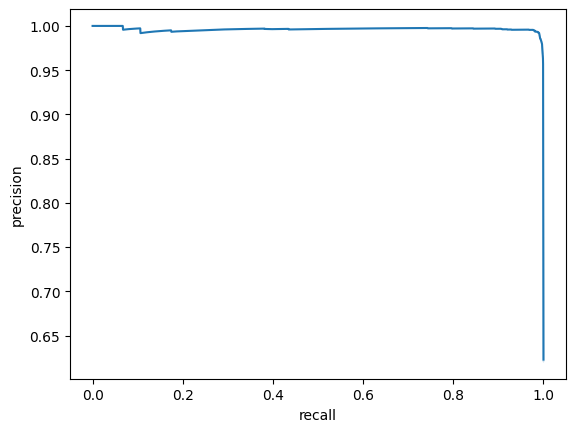

In [ ]:
# precision recall graph
sns.lineplot(data = precision_recall_all, x = 'recall', y = 'precision')